In [5]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

import glob
import pandas as pd
import scipy.io

from __future__ import division

<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\sven-alles
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\sven-alles
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
glob.glob("f:/leiden data/summarized/*")

['f:/leiden data/summarized\\all_cc_all_data.mat',
 'f:/leiden data/summarized\\all_reversible.mat',
 'f:/leiden data/summarized\\reversible_types.mat']

In [20]:
(
    notP,seed,step_num,
    cc_strained,cc_no,
    gamma_before,gamma_after,
    s_xy_strained_min,s_xy_strained_plus,
    U_strained_min,U_strained_plus,
    rsq,affinersq,
    Lxx,Lxy,Lyx,Lyy,
    ccr0,ccr1,ccr2,ccr3,
    num_cc_changed_r0,num_cc_changed_r1,num_cc_changed_r2,num_cc_changed_r3,
    COMx,COMy,
    prat,
    num01p,num05p,num10p,num15p,num20p,
    num01s,num05s,num10s,num15s,num20s,
    rad_gyr_01p,rad_gyr_05p,rad_gyr_10p,rad_gyr_15p,rad_gyr_20p,
    rad_gyr_01s,rad_gyr_05s,rad_gyr_10s,rad_gyr_15s,rad_gyr_20s,
    rad_hyd_01p,rad_hyd_05p,rad_hyd_10p,rad_hyd_15p,rad_hyd_20p,
    rad_hyd_01s,rad_hyd_05s,rad_hyd_10s,rad_hyd_15s,rad_hyd_20s,
    rad_gr_w,rad_hr_w,
    _,_,_
) = scipy.io.loadmat(r"F:\Leiden Data\Summarized\all_cc_all_data")['all_cc_times_512'].T

pressure = notP.copy()
pressure[notP>0.1] = (notP/1e3)[notP>0.1]

\includegraphics{notebooks/sven-alles/udecrease-fraction.pdf}


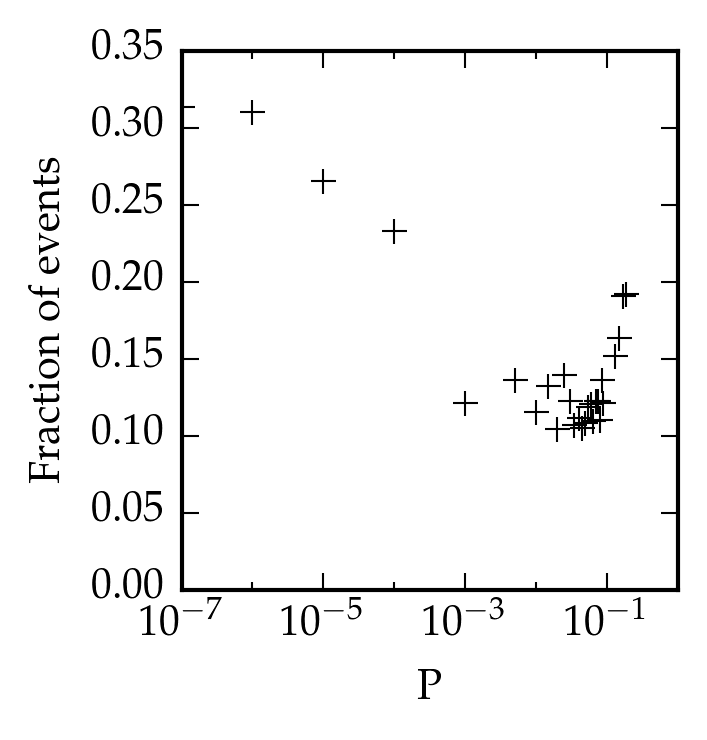

In [12]:
halffig()
for p in sorted(np.unique(pressure)):
    msk = pressure == p
    
    #print p, np.sum(msk), "events"
    #print np.mean(s_xy_strained_plus[msk] < 0), " fraction sigma < 0"
    #plt.plot(p, np.mean(s_xy_strained_plus[msk] < 0), "kx")
    #print np.mean(U_strained_plus < U_strained_min), "events with U+ < U- = upper bound rearrs"    
    plt.plot(p, np.mean(U_strained_plus[msk] < U_strained_min[msk]), "k+")
    
plt.semilogx()
plt.xlabel("P")
plt.ylabel("Fraction of events")

plt.axis(ymin=0)
plt.gca().set_xticks([1e-7,1e-5,1e-3,1e-1])
plt.gca().set_xticks([1e-6,1e-4,1e-2], minor=True)

plt.savefig('udecrease-fraction.pdf')

4843 0.00666352908258 1041.44786289
4968 0.00656392311525 1063.38405797
4988 0.00625067968853 972.09202085
4988 0.0059835052135 890.767241379
2500 0.00652719112636 266.2764
2500 0.0068557712914 293.76
2500 0.00639489296236 255.5916
2500 0.00677850248949 287.1756
2500 0.00611557487077 233.7516
2500 0.00693143102108 300.2796
2500 0.00656414990688 269.3004
2500 0.00617717605383 238.4844
2500 0.00629747377922 247.8636
2500 0.00612591087105 234.5424
2500 0.00620760823506 240.84
2500 0.00646162332545 260.9536
2500 0.00650857403738 264.7596
2500 0.00624781049649 243.9696
2500 0.00655494439336 268.5456
2500 0.00656414990688 269.3004
2500 0.00625779513886 244.75
2500 0.0068557712914 293.76
2500 0.00652719112636 266.2764
2500 0.00717265473866 321.5436
2500 0.007398244116 342.0876
2500 0.00785233315646 385.3696
2500 0.00787746152006 387.84
\includegraphics{notebooks/sven-alles/udecrease-fraction-errorbar.pdf}


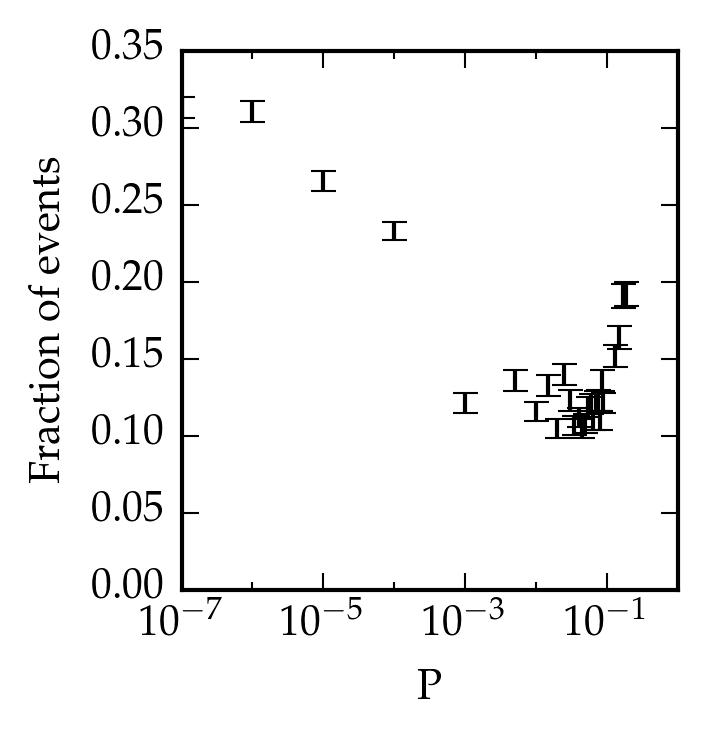

In [13]:
halffig()
for p in sorted(np.unique(pressure)):
    msk = pressure == p
    
    prob = np.mean(U_strained_plus[msk] < U_strained_min[msk])
    num = np.sum(msk)
    err = np.sqrt(num*prob*(1-prob))/num
    print num,err,num*prob*(1-prob)
    #print p, np.sum(msk), "events"
    #print np.mean(s_xy_strained_plus[msk] < 0), " fraction sigma < 0"
    #plt.plot(p, np.mean(s_xy_strained_plus[msk] < 0), "kx")
    #print np.mean(U_strained_plus < U_strained_min), "events with U+ < U- = upper bound rearrs"    
    plt.errorbar(p, prob, yerr=err, color="k")
    
plt.semilogx()
plt.xlabel("P")
plt.ylabel("Fraction of events")

plt.axis(ymin=0)
plt.gca().set_xticks([1e-7,1e-5,1e-3,1e-1])
plt.gca().set_xticks([1e-6,1e-4,1e-2], minor=True)

plt.savefig('udecrease-fraction-errorbar.pdf')

\includegraphics{notebooks/sven-alles/s-lt-zero-fraction.pdf}


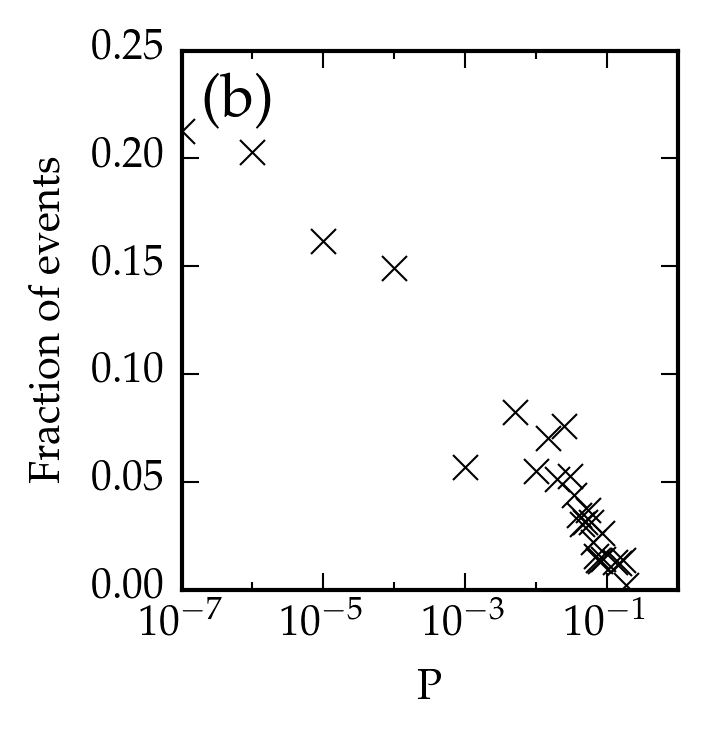

In [14]:
halffig()
for p in sorted(np.unique(pressure)):
    msk = pressure == p
    
    #print p, np.sum(msk), "events"
    #print np.mean(s_xy_strained_plus[msk] < 0), " fraction sigma < 0"
    plt.plot(p, np.mean(s_xy_strained_plus[msk] < 0), "kx")
    #print np.mean(U_strained_plus < U_strained_min), "events with U+ < U- = upper bound rearrs"    
    #plt.plot(p, np.mean(U_strained_plus[msk] < U_strained_min[msk]), "k+")
    
plt.semilogx()
plt.xlabel("P")
plt.ylabel("Fraction of events")

plt.axis(ymin=0)
plt.gca().set_xticks([1e-7,1e-5,1e-3,1e-1])
plt.gca().set_xticks([1e-6,1e-4,1e-2], minor=True)

subplotlabel('(b)')
plt.savefig('s-lt-zero-fraction.pdf')

In [10]:
print len(pressure), "total events"
print np.sum(s_xy_strained_plus < 0), "events with sigma < 0 after event"

print np.sum(s_xy_strained_plus < s_xy_strained_min), "events with sigma+ < sigma-"
print np.sum(U_strained_plus < U_strained_min), "events with U+ < U-"

77287 total events
5589 events with sigma < 0 after event
16863 events with sigma+ < sigma-
12946 events with U+ < U-


In [11]:
print np.sum( (s_xy_strained_plus < 0) * (U_strained_plus < U_strained_min)), "sigma < 0 and smaller U"

5261 sigma < 0 and smaller U


In [6]:
cmap = 'viridis'
norm = mpl.colors.LogNorm(vmin=1e-4, vmax=1e-1)

rdS = np.log10( np.abs((s_xy_strained_plus - s_xy_strained_min)/s_xy_strained_min))
rdE = np.log10( -((U_strained_plus - U_strained_min)/U_strained_min))
logrsq = np.log10(rsq)

rsqbins = np.linspace(-30,0,101)
rsqext = [-30,0]
Sbins = np.linspace(-10,5,101)
Sext = [-10,5]
Ebins = np.linspace(-15,5,101)
Eext = [-15,5]

In [23]:
print "["
for lP in [-6,-2]:
    msk = np.round(np.log10(pressure),2) == lP
    msk *= np.isfinite(rdE)
    msk *= rdE < -1e-5

    for i,jump in enumerate(np.sort(rdE[msk])[::-1]):
        m = (rdE == jump)
        print "[", lP, ",",jump, ",",seed[m][0], ",",step_num[m][0], "],"
        if i == 4:
            break       
            
print "]"

[
[ -6 , -0.000254672341966 , 8022.0 , 531.0 ],
[ -6 , -0.0200687887767 , 8057.0 , 266.0 ],
[ -6 , -0.0290803979822 , 8017.0 , 732.0 ],
[ -6 , -0.0341788242125 , 8001.0 , 603.0 ],
[ -6 , -0.037693215167 , 8098.0 , 224.0 ],
[ -2 , -0.768527384622 , 8038.0 , 176.0 ],
[ -2 , -0.918365224629 , 8058.0 , 360.0 ],
[ -2 , -0.994313200278 , 8005.0 , 458.0 ],
[ -2 , -1.08544630174 , 8096.0 , 165.0 ],
[ -2 , -1.09999621629 , 8080.0 , 76.0 ],
]


Optie 2: hybrid 2x2+2
----------------------

In [17]:
def doplot(ax,x,y,xbins,ybins,extent,xt,xst,yt,yst,xlabel,ylabel):
    cts = histogram2d(x, y, [xbins, ybins], normed=False)[0].T
    cts = cts / len(x)
    print -np.log10(len(x)), np.log10(np.amax(cts))
    m = ax.imshow(cts, cmap='viridis', norm=norm,
              interpolation='None', extent=extent,
              origin='lower', aspect='auto')

    ax.set_xticks(xt)
    ax.set_xticklabels(["$10^{%i}$" % i for i in xt])
    ax.set_xticks(xst, minor=True)

    ax.set_yticks(yt)
    ax.set_yticks(yst, minor=True)
    ax.set_yticklabels(["$10^{%i}$" % i for i in yt])

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return m

-6 1542
-3.18808437371 -1.88705437805
-3.18808437371 -2.04195633804
-3.18808437371 -1.710963119
-2 289
-2.46089784276 -1.55780785576
-2.46089784276 -1.2848065837
-2.46089784276 -1.46089784276
\includegraphics{notebooks/sven-alles/event-fractions.pdf}


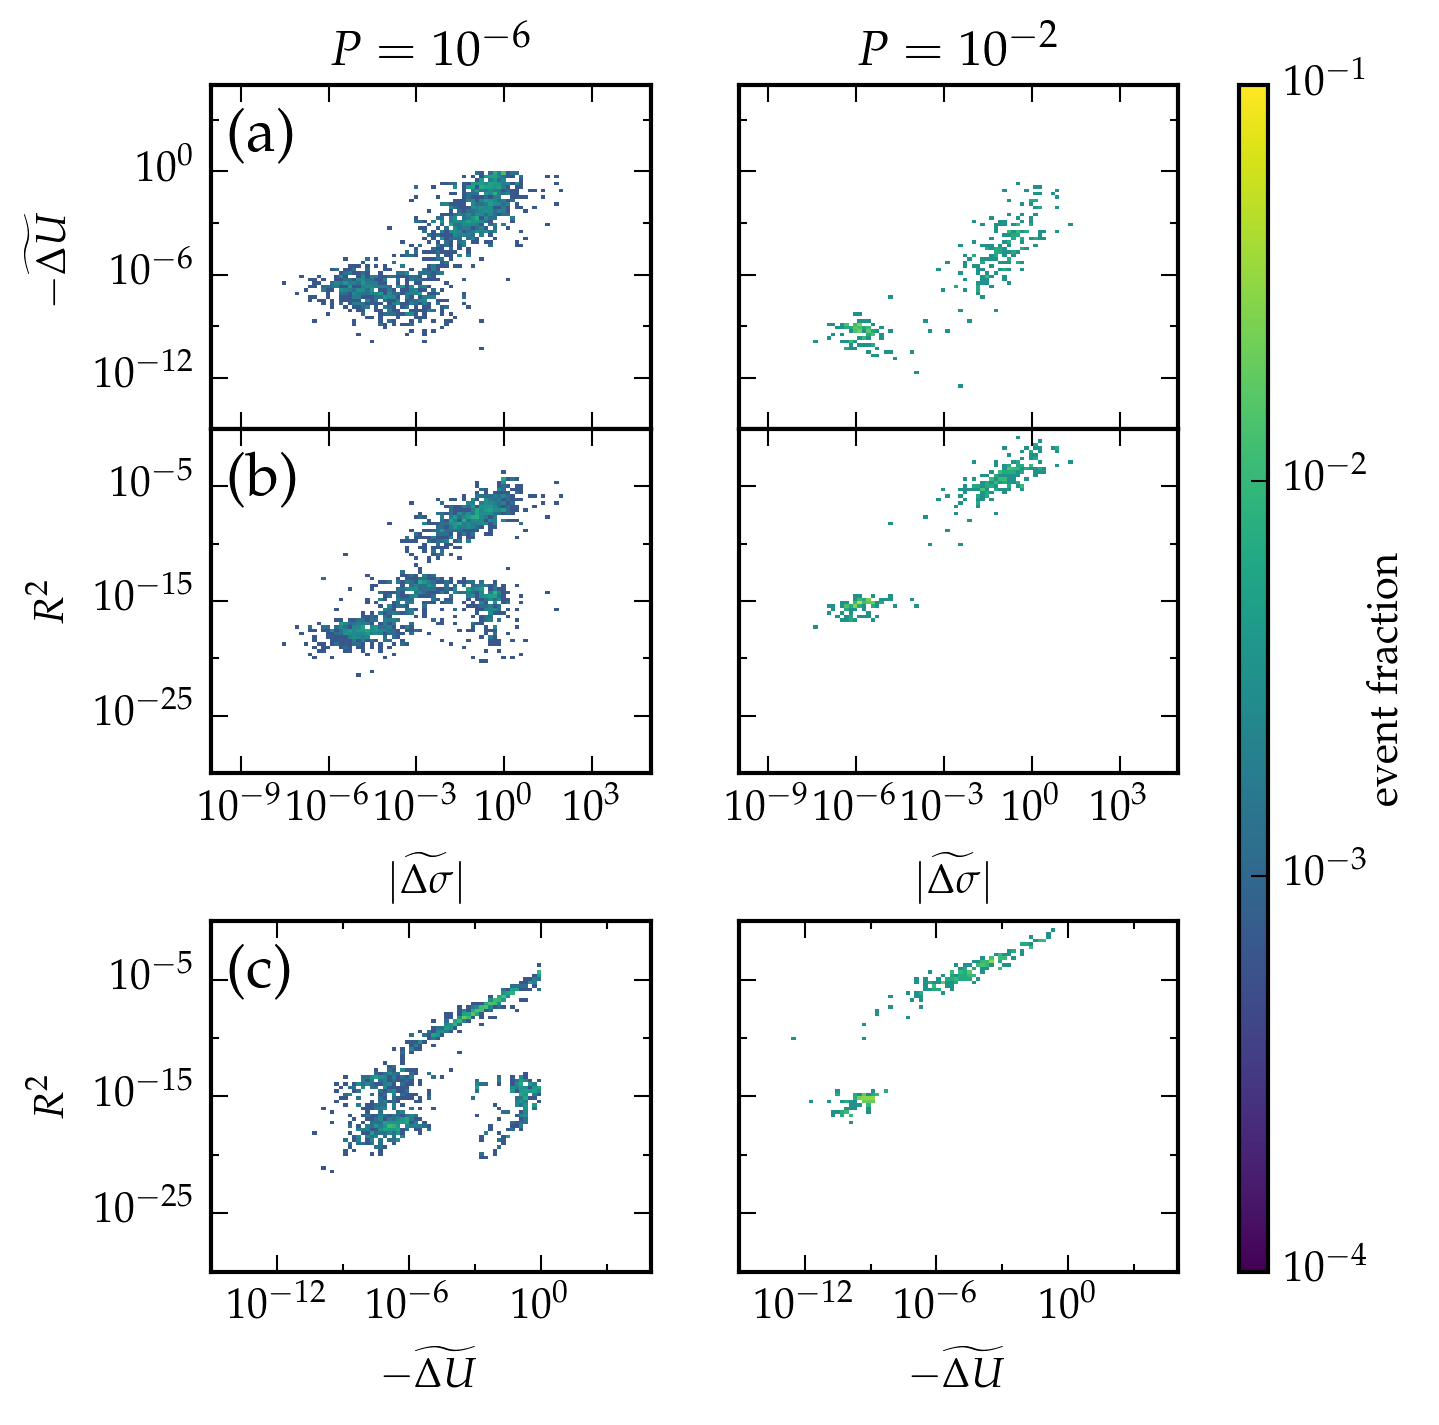

In [18]:
fullfig(hf=2.2)
gs0 = mpl.gridspec.GridSpec(3, 2, hspace=0.5, height_ratios=[1,1,1.3], left=0.15)
gs00 = mpl.gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs0[:2,:2], hspace=0)
gs01 = mpl.gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[-1,:2], hspace=0.5)

axes = []

for col, p in enumerate([-6, -2]):
    msk = np.round(np.log10(pressure),2) == p
    msk *= np.isfinite(rdE)

    print p, sum(msk)

    # dU vs dS
    ax = plt.subplot(gs00[0,col])
    ax.set_title("$P=10^{%i}$" % p)
    axes.append(ax)

    m = doplot(
        ax=ax,
        x = rdS[msk], y = rdE[msk],
        xbins = Sbins, ybins = Ebins,
        extent = Sext + Eext,
        xt = [-9,-6,-3,0,3],
        xst = [],
        yt = [-12, -6, 0],
        yst = [-9,-3,3],
        xlabel = "",
        ylabel = "$-\widetilde{\Delta U}$",
    )
    ax.set_xticklabels([])
    
    if col == 1:
        ax.set_yticklabels([])
        ax.set_ylabel("")

    if col == 0:
        subplotlabel('(a)', ax=ax)
    
    #ax.axhline(-6, color="black", ls=":", zorder=-1)
    #ax.axvline(-4, color="black", ls=":", zorder=-1)
    
    
    # rsq vs dS
    ax = plt.subplot(gs00[1,col])
    axes.append(ax)

    m = doplot(
        ax=ax,
        x = rdS[msk], y = logrsq[msk],
        xbins = Sbins, ybins = rsqbins,
        extent = Sext + rsqext,
        xt = [-9,-6,-3,0,3],
        xst = [],
        yt = [-25,-15,-5],
        yst = [-20,-10,0],
        xlabel = r"$|\widetilde{\Delta \sigma}|$",
        ylabel = "$R^2$",
    )
    
    if col == 1:
        ax.set_yticklabels([])
        ax.set_ylabel("")

    if col == 0:
        subplotlabel('(b)', ax=ax)
        
    #ax.axhline(-11, color="black", ls=":", zorder=-1)
    #ax.axvline(-4, color="black", ls=":", zorder=-1)
    
    # rsq vs dS
    ax = plt.subplot(gs01[0,col])
    axes.append(ax)

    m = doplot(
        ax=ax,
        x = rdE[msk], y = logrsq[msk],
        xbins = Ebins, ybins = rsqbins,
        extent = Eext + rsqext,
        xt = [-12, -6, 0],
        xst = [-9,-3,3],
        yt = [-25,-15,-5],
        yst = [-20,-10,0],
        xlabel = r"$-\widetilde{\Delta U}$",
        ylabel = "$R^2$",
    )
    
    if col == 1:
        ax.set_yticklabels([])
        ax.set_ylabel("")

    if col == 0:
        subplotlabel('(c)', ax=ax)
        
    #ax.axhline(-11, color="black", ls=":", zorder=-1)  # RSQ
    #ax.axvline(-6, color="black", ls=":", zorder=-1)  # U
    
cb = plt.colorbar(mappable=m, ax=axes, aspect=40)
cb.set_label("event fraction", labelpad=0) 

plt.savefig('event-fractions.pdf')